# U.S. Medical Insurance Costs

The goal of this project is to showcase knowledge of Python basics to analyze a .CSV that contains US medical insurance costs and related factors. The project will be broken down into 3 separate parts:

1. Importing the file and creating the class and methods necessary to analyze the data.
2. Analyzing the data to determine what this data describes.
3. Using the data to answer questions a business might have about the data.

# Importing the File and Creating The Class

We'll need to import the .csv and create a couple of methods to help us better analyze the contents of the file. The methods can be used in the future when we get new csvs to quickly repeat the work we do here.

In [74]:
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
import numpy
from scipy.stats import skew


class MedicalData:
    def __init__(self, file):
        with open(file, newline='') as insurancecsv:
            insurance_data = csv.DictReader(insurancecsv)
            data = list(insurance_data)
        self.data = data 
        self.ages = [row["age"] for row in data]
        self.sexes = [row["sex"] for row in data]
        self.bmis = [row['bmi'] for row in data]
        self.children = [row['children'] for row in data]
        self.smokers = [row['smoker'] for row in data]
        self.regions = [row['region'] for row in data]
        self.charges = [row['charges'] for row in data]
    
    def visualize_ages(self):
        temp = self.ages
        temp.sort()
        df_ages = pd.DataFrame(temp, columns=['Age'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_ages['Age'], kde=False, bins=range(int(df_ages['Age'].min()), int(df_ages['Age'].max()) + 2, 1), color='blue')
        plt.xticks(rotation=90)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.show()
        return
    
    def visualize_sexes(self):
        df_sexes = pd.DataFrame(self.sexes, columns=['Sex'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_sexes['Sex'])
        plt.title('Sex Distribution')
        plt.xlabel('Sex')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_bmis(self):
        floored_bmis = [math.floor(float(row)) for row in self.bmis]
        df_bmis = pd.DataFrame(floored_bmis, columns=['BMI'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_bmis['BMI'],kde=True, bins=38, color='blue')
        plt.title('BMI Distribution')
        plt.xlabel('BMI Bucket')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_children(self):
        temp = self.children
        temp.sort()
        df_children = pd.DataFrame(temp, columns=['Children'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_children['Children'],kde=False, bins=6, color='blue')
        plt.title('Children Distribution')
        plt.xlabel('Children')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_smokers(self):
        df_smokers = pd.DataFrame(self.smokers, columns=['Smoker'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_smokers['Smoker'],kde=False, bins=2, color='blue')
        plt.title('Smoker Distribution')
        plt.xlabel('Smoker')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_regions(self):
        df_regions = pd.DataFrame(self.regions, columns=['Sex'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_regions['Sex'])
        plt.title('Region Distribution')
        plt.xlabel('Region')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_charges(self):
        bucketed_charges = [(math.floor(float(row)/100)*100) for row in self.charges]
        df_charges = pd.DataFrame(bucketed_charges, columns=['Charges'])
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.histplot(df_charges['Charges'], kde=False, bins=range(min(bucketed_charges),max(bucketed_charges) + 1, 100), color='blue')
        plt.title('Charges Distribution')
        plt.xlabel('Charge (Bucketed in groups of $100) ($)')
        plt.ylabel('Frequency')
        plt.show()
        return

    def visualize_all(self):
        self.visualize_ages()
        self.visualize_sexes()
        self.visualize_bmis()
        self.visualize_children()
        self.visualize_smokers()
        self.visualize_regions()
        self.visualize_charges()
        return

    def analyze_ages(self):
        #Making a dictionary where the index is an integer representing age, and the value is the count of that age in the .csv.
        age_dict = {}
        for age in self.ages:
            if int(age) in age_dict:
                age_dict[int(age)] += 1
            else:
                age_dict[int(age)] = 1
        #Making a sorted list of the ages as integers. This will make calculations of various statistics easier
        sorted_ages = [int(age) for age in self.ages]
        sorted_ages.sort()
        print(f"There are {len(self.ages)} total people in the data set")
        print(f"Age range: {min(sorted_ages)} - {max(sorted_ages)}")
        print(f"Average (mean) age is: {round(sum(int(age) for age in self.ages)/len(self.ages),0)}")
        print(f"Median age is: {statistics.median(sorted_ages)}")
        print(f"Mode (most frequently occuring age) of age is: {statistics.mode(sorted_ages)}")
        print(f"18-19: {round(sum(age_dict.get(age, 0) for age in range(18, 20))/len(self.ages)*100,2)}%")
        print(f"20-29: {round(sum(age_dict.get(age, 0) for age in range(20, 30))/len(self.ages)*100,2)}%")
        print(f"30-39: {round(sum(age_dict.get(age, 0) for age in range(30, 40))/len(self.ages)*100,2)}%")
        print(f"40-49: {round(sum(age_dict.get(age, 0) for age in range(40, 50))/len(self.ages)*100,2)}%")
        print(f"50-59: {round(sum(age_dict.get(age, 0) for age in range(50, 60))/len(self.ages)*100,2)}%")
        print(f"60-69: {round(sum(age_dict.get(age, 0) for age in range(60, 70))/len(self.ages)*100,2)}%")
        print(f"70-79: {round(sum(age_dict.get(age, 0) for age in range(70, 80))/len(self.ages)*100,2)}%")
        print(f"80-89: {round(sum(age_dict.get(age, 0) for age in range(80, 90))/len(self.ages)*100,2)}%")
        return 


    def analyze_sexes(self):
        print(f"Male: {self.sexes.count('male')} ({round(self.sexes.count('male')/len(self.sexes)*100, 2)}%)")
        print(f"Female: {self.sexes.count('female')} ({round(self.sexes.count('female')/len(self.sexes)*100, 2)}%)")
        return 

    def analyze_bmis(self):
        sorted_bmis = [float(bmi) for bmi in self.bmis]
        sorted_bmis.sort()
        print(f"BMI range: {min(sorted_bmis)} - {max(sorted_bmis)}")
        print(f"Average (Mean) BMI is: {round((sum(float(bmi) for bmi in self.bmis))/len(self.bmis), 2)}")
        print(f"Median BMI is: {statistics.median(sorted_bmis)}")
        print(f"Standard Deviation: {statistics.stdev(sorted_bmis)}")
        print(f"Interquartile Range: {numpy.percentile(sorted_bmis, 75) - numpy.percentile(sorted_bmis, 25)}")        
        return 

    def analyze_children(self):
        sorted_children = [int(children) for children in self.children]
        sorted_children.sort()
        print(f"Average (mean) children is: {round(sum(sorted_children)/len(sorted_children), 2)}")
        print(f"Median children is: {statistics.median(sorted_children)}")
        for number in set(sorted_children):
            print(f"{number} Children: {round((sorted_children.count(number)/len(sorted_children))*100, 2)}%")
        return 

    def analyze_smokers(self):
        print(f"Non-smokers: {round(self.smokers.count("no")/len(self.smokers)*100,2)}%")
        print(f"Smokers: {round(self.smokers.count("yes")/len(self.smokers)*100,2)}%")
        return 

    def analyze_regions(self):
        for region in set(self.regions):
            print(f"{region.capitalize()}: {round((self.regions.count(region)/len(self.regions))*100,2)}%")
        return 

    def analyze_charges(self):
        sorted_charges = [round(float(charge),2) for charge in self.charges]
        sorted_charges.sort()
        print(f"Charge range: ${min(sorted_charges)} - ${max(sorted_charges)}")
        print(f"Average (mean) charge: ${round(sum(sorted_charges)/len(sorted_charges),2)}")
        print(f"Median charge: ${round(statistics.median(sorted_charges), 2)}")
        print(f"Skewness: {skew(sorted_charges)}")
        print(f"Standard Deviation: {statistics.stdev(sorted_charges)}")
        print(f"Interquartile Range: {numpy.percentile(sorted_charges, 75) - numpy.percentile(sorted_charges, 25)}")   
        return 

    def analyze_all(self):
        self.analyze_ages()
        self.analyze_sexes()
        self.analyze_bmis()
        self.analyze_children()
        self.analyze_smokers()
        self.analyze_regions()
        self.analyze_charges()
        return
    
    def analyze_and_visualize_all(self):
        self.analyze_ages()
        self.visualize_ages()
        self.analyze_sexes()
        self.visualize_sexes()
        self.analyze_bmis()
        self.visualize_bmis()
        self.analyze_children()
        self.visualize_children()
        self.analyze_smokers()
        self.visualize_smokers()
        self.analyze_regions()
        self.visualize_regions()
        self.analyze_charges()
        self.visualize_charges()
        return

insurance_data = MedicalData("insurance.csv")

# Analyzing the Data and Describing our Data Set

Now that we've got all our class methods, let's run them and see what is contained in this data set and if there's anything noteworthy.

There are 1338 total people in the data set
Age range: 18 - 64
Average (mean) age is: 39.0
Median age is: 39.0
Mode (most frequently occuring age) of age is: 18
18-19: 10.24%
20-29: 20.93%
30-39: 19.21%
40-49: 20.85%
50-59: 20.25%
60-69: 8.52%
70-79: 0.0%
80-89: 0.0%


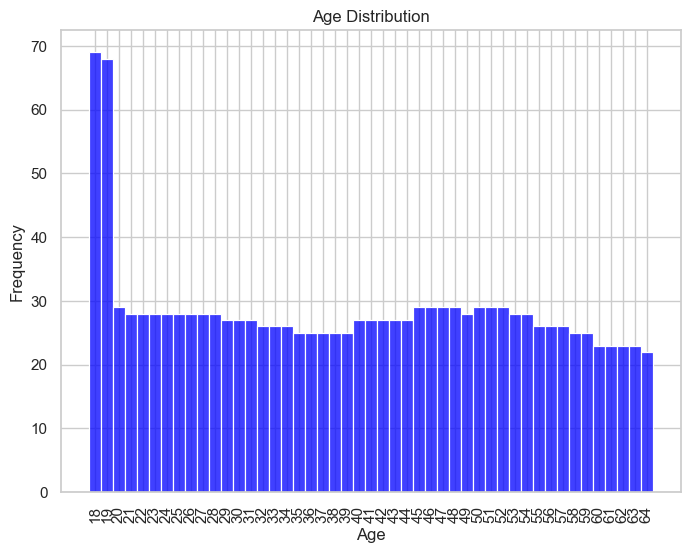

Male: 676 (50.52%)
Female: 662 (49.48%)


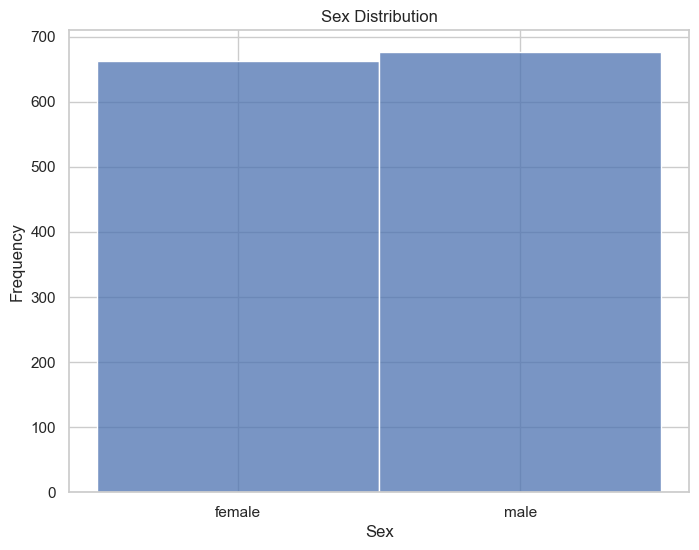

BMI range: 15.96 - 53.13
Average (Mean) BMI is: 30.66
Median BMI is: 30.4
Standard Deviation: 6.098186911679014
Interquartile Range: 8.3975


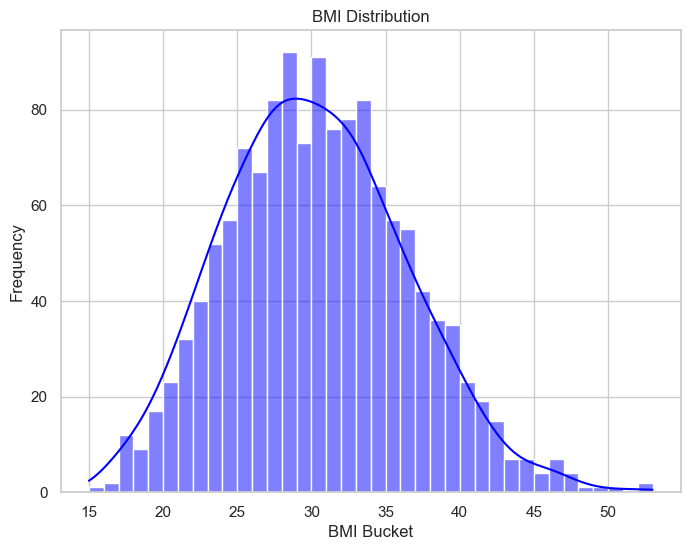

Average (mean) children is: 1.09
Median children is: 1.0
0 Children: 42.9%
1 Children: 24.22%
2 Children: 17.94%
3 Children: 11.73%
4 Children: 1.87%
5 Children: 1.35%


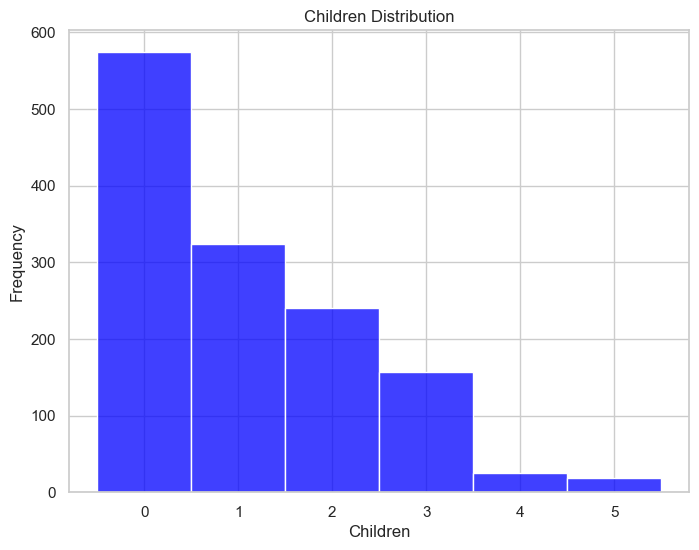

Non-smokers: 79.52%
Smokers: 20.48%


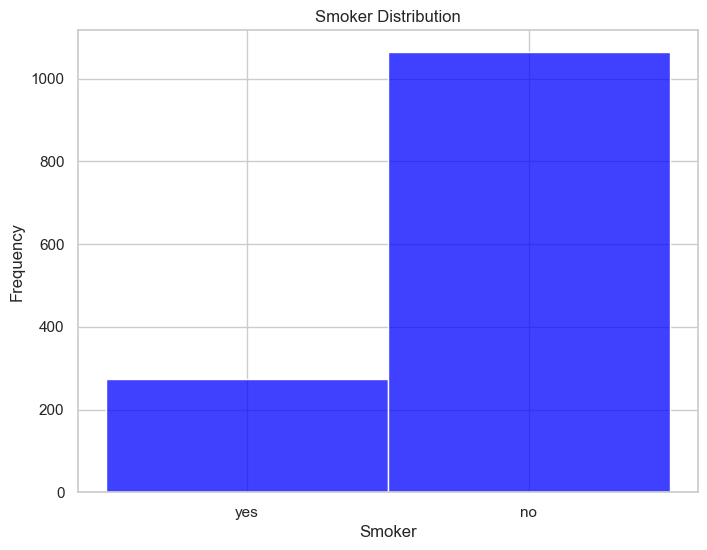

Northwest: 24.29%
Southeast: 27.2%
Southwest: 24.29%
Northeast: 24.22%


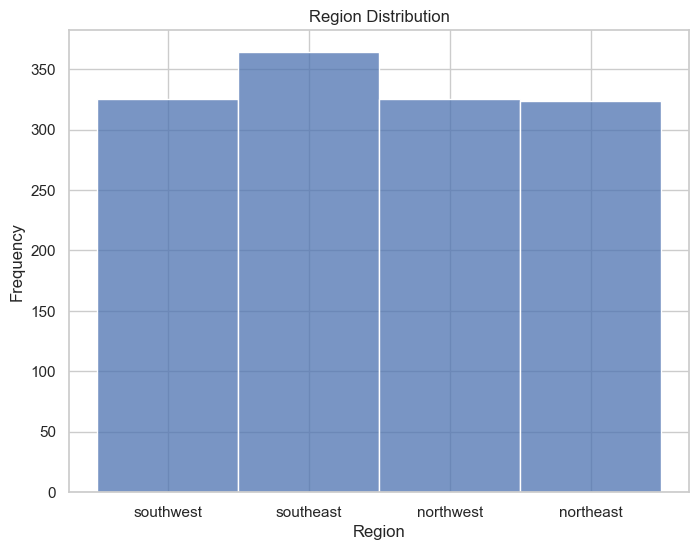

Charge range: $1121.87 - $63770.43
Average (mean) charge: $13270.42
Median charge: $9382.03
Skewness: 1.514179723322785
Standard Deviation: 12110.011272350186
Interquartile Range: 11899.6275


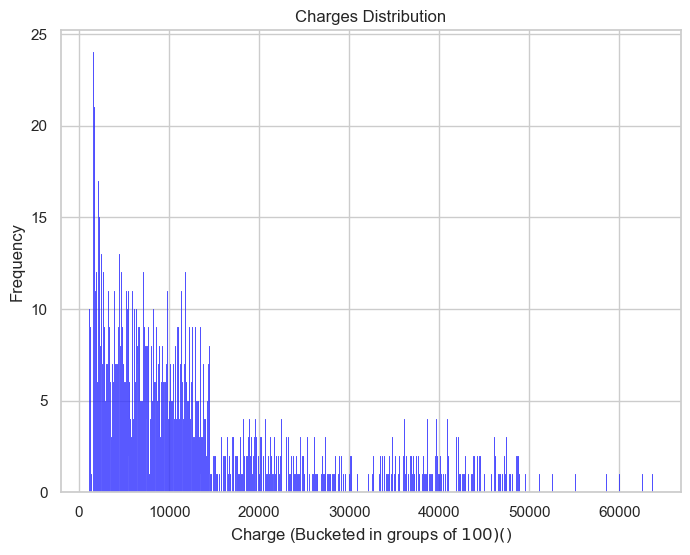

In [75]:
insurance_data.analyze_and_visualize_all()

So what does this mean for our data set? There are a couple of ways we could describe it.

- Ages are fairly evenly distributed, however there's a high number of people who are 18 and 19 compared to other ages
- Both sexes are evenly represented in the data, though that may not be true when looking at specific other properties (for example, smokers)
- BMI is a normal distribution, with 2/3 of the data set lying between a BMI of 23 and 36
- Most people in the data set have at least one child, though the most frequent number of children is 0
- The data set is heavily skewed towards non-smokers, with smokers only representing 20% of the data.
- Regions are all equally represented, with the southeast region being slightly more common than the others.
- Charges are very right skewed, with roughly 2/3 of all charges being between $1160 and $25380. There is a long tail of charges up to $63000.

# Answering Business Questions

That we've got a pretty solid grasp on the data, let's use it to try and answer two business questions. The first question is pretty straightforward.

- Are people having less children now than previously?

For the second question, I'm imagining working at a small insurance company that's setting up a website to give quotes and estimates to new customers. They've noticed that customers absolutely *hate* filling out surveys to try and get an estimate, and that after filling out 2 questions most customers leave the website, never to return. With this information, they want to see if there's an easier way for us to estimate their costs in a meaningful way. Put more concisely:

- Can we ask a potential customer only 2 pieces of information and give them a reasonable cost estimate?

## Are People Having Less Children Now

So before we try to answer this question, there are a couple of caveats and assumptions we should make clear:

**Assumptions**
- All children listed in the .csv are natural born children. While adopted children obviously also born, it may skew data if we're looking at births within a country.
- The .csv is from this year (2025), meaning a person who is listed as 18 years old was born 18 years prior in 2007

**Caveats**
- This is not an ideal data set to try and answer the question posed. Ideally, we'd be looking at births, and we have no idea how these people were sampled.
- The .csv only includes living children, and does not include children who have passed.
- The list spans people between the ages of 18 - 63. This is 2-5 generations, which isn't a long time to compare data from.
- We will only be counting the children that women in the list have. If both parents are in the list, and they each have 5 children, this will duplicate the number of children. That means that if for any given age, we have more men than women, the data will not be accurate.
- **I do not expect to have a satisfactory answer to the question, but I want to try anyways.**


### Approach

There are two approaches I've considered:

1. 
    - Find the average children for each age
    - Compare each age bucket

2. 
    - Bucket ages by generation
    - Calculate average age per generation
    - Compare generations

Since both are pretty similar, it shouldn't take much time to do both and compare the results. Here are the generation definitions we'll be using:

Gen Z: 1995 - 2012
Millenials: 1980 - 1994
Gen X: 1965 - 1979
Baby Boomers: 1946 - 1964

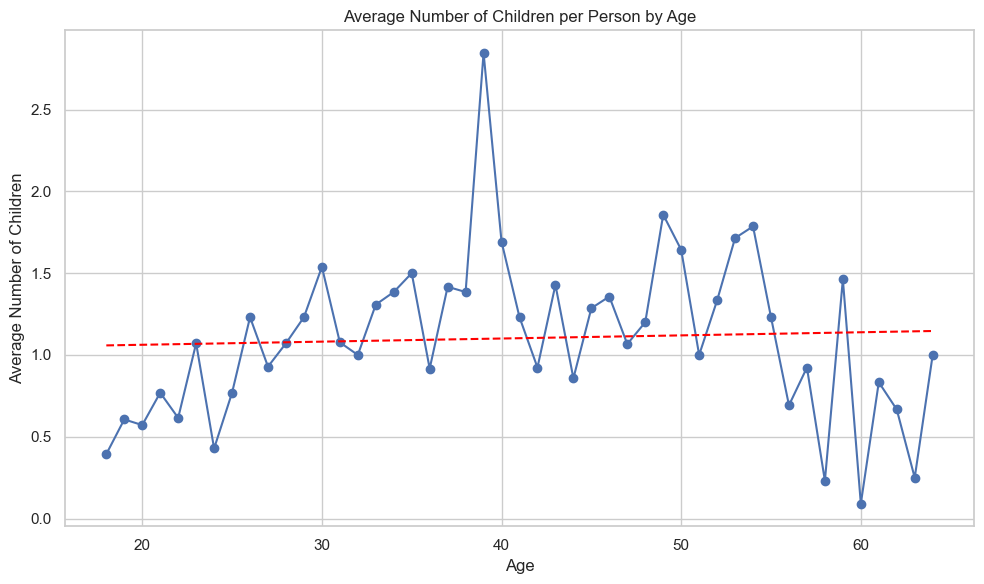

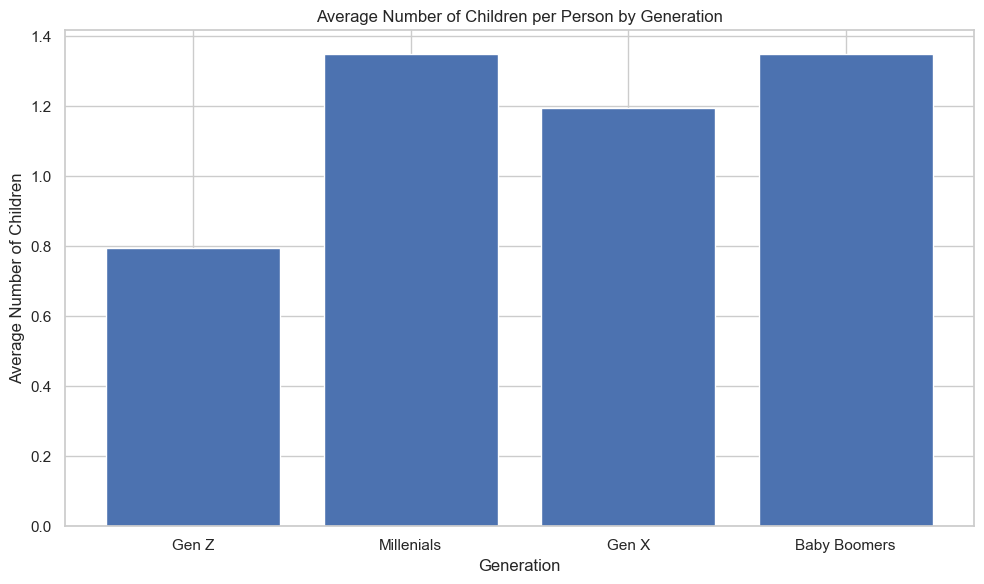

In [76]:
current_year = 2025
gen_z = range(1995, 2013, 1)
millenials = range(1980, 1995, 1)
gen_x = range(1965, 1980, 1)
baby_boomers = range(1946, 1965, 1)

age_frequency = {int(age) : 0 for age in set(insurance_data.ages)}
age_children = {int(age) : 0 for age in set(insurance_data.ages)}

generation_frequency = {"Gen Z": 0, "Millenials": 0, "Gen X": 0, "Baby Boomers": 0}
generation_children = {"Gen Z": 0, "Millenials": 0, "Gen X": 0, "Baby Boomers": 0}

for row in insurance_data.data:
    if row["sex"] == 'female':
        age_frequency[int(row["age"])]+= 1
        age_children[int(row["age"])] += int(row["children"])
        if current_year - int(row['age']) in gen_z: 
            generation_children["Gen Z"] += int(row["children"])
            generation_frequency["Gen Z"] += 1
        if current_year - int(row['age']) in gen_x:
            generation_children["Gen X"] += int(row["children"])
            generation_frequency["Gen X"] += 1
        if current_year - int(row['age']) in millenials:
            generation_children["Millenials"] += int(row["children"])
            generation_frequency["Millenials"] += 1
        if current_year - int(row['age']) in millenials:
            generation_children["Baby Boomers"] += int(row["children"])
            generation_frequency["Baby Boomers"] += 1               
        
age_average_children = {
    age: age_children[age]/age_frequency[age] 
    for age in age_children 
    #just to prevent any accidents if we ever get a value of 0 somewhere
    if age in age_frequency and age_frequency[age] != 0}

generation_average_children = {
    generation: generation_children[generation]/generation_frequency[generation]
    for generation in generation_children
}


age_sorted_average = dict(sorted(age_average_children.items()))
ages = list(age_sorted_average.keys())
averages = list(age_sorted_average.values())
slope, intercept = numpy.polyfit(numpy.array(ages), numpy.array(averages), 1)
fit_line = slope * numpy.array(ages) + intercept

plt.figure(figsize=(10, 6))
plt.plot(ages, averages, marker='o') 
plt.plot(ages, fit_line, linestyle='--', color='red', label='Best Fit Line')
plt.title("Average Number of Children per Person by Age")
plt.xlabel("Age")
plt.ylabel("Average Number of Children")
plt.grid(True)
plt.tight_layout()
plt.show()

generations = list(generation_average_children.keys())
averages = list(generation_average_children.values())

plt.figure(figsize=(10, 6))
plt.bar(generations, averages)
plt.title("Average Number of Children per Person by Generation")
plt.xlabel("Generation")
plt.ylabel("Average Number of Children")
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusion

According to the data set and with the described approach, we see that Gen Z has less children on average than other generations, but that the remaining generations in the data set have aroughly the same averages. Neither approach indicates that there is a strong link between being older and having had more children. **However, I would strongly urge any business to not draw conclusions from the answers above**

In reality, this likely goes to show that this data set is not a good data set to try and answer the question.

- We do not know how the data was collected, or how people were selected/sampled
- We do not know how representative the data set is of the general population
- We do not account for births, but rather children currently alive and insured. This would omit the births of children that have passed.

With all the being said, if I was working some place and had to use this data to answer the question, I'd likely have to do all this work just to prove the point that this is not a good data set to answer the question, so I don't think trying to answer the question was a waste of time.

## Can We Estimate Costs With Only 2 Pieces of Information?

If our prospective customers are dropping from our questionnaire on the 3rd question, and we can only reliably ask 2 questions to prospective customers before we give them an estimate, **what are the two best questions to ask?**

To discover this, we can calculate the correlation factor of each data point with charges. This will help us understand which data points (age, sex, bmi, etc.) most explains the medical insurance costs.

In [77]:
df = pd.DataFrame(insurance_data.data[1:], columns=insurance_data.data[0])
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
correlation_matrix = df_encoded.corr()
correlation_with_cost = correlation_matrix['charges'].drop('charges')
print(correlation_with_cost)

age                 0.299571
bmi                 0.198464
children            0.068224
sex_female         -0.057542
sex_male            0.057542
smoker_no          -0.787983
smoker_yes          0.787983
region_northeast    0.006476
region_northwest   -0.039784
region_southeast    0.074131
region_southwest   -0.043657
Name: charges, dtype: float64


Correlation factor is represented by a number between 1 and -1. The closer to 1 or -1, the stronger the correlation.

Looking at the above data, we can see that the strongest correlations are:
- Smoker (0.79)
- Age (0.30)
- BMI (0.20)

All other data points have a very weak correlation, so any solution we focus on should make use of 2 of these 3 data points to ensure we have as accurate a result as possible.

### Approaches

There are two couple of approaches we could consider:

1. Collect Age and Smoking status, then output the range of charges and average charges given those criteria
2. Collect Age and BMI, then output the range of charges and average charges given those criteria. This might give us a smaller range as BMI is more precise than smoking status.
3. We could also collect two data points, and instead of referring back to the existing data set, attempt to train a model that will predict the range and average for the two data points we've collected.

### Method 1: Collect Age and Smoking status, output average + range

In [78]:
input_age = 19
input_smoking = 'yes'


def estimate_charges_age_smoking(age, smoking, verbose = True):
    min_charges = float('inf')
    max_charges = 0
    total_charges = 0
    count_charges = 0

    for row in insurance_data.data:
        if int(row['age']) == age and row['smoker'] == smoking:
            total_charges += float(row['charges'])
            count_charges += 1
            if float(row['charges']) < min_charges: min_charges = float(row['charges'])
            if float(row['charges']) > max_charges: max_charges = float(row['charges'])

    if count_charges != 0: average_charges = total_charges/count_charges

    if count_charges != 0 and verbose: print(f'Age: {age}, smoker: {smoking}, charges will range from ${round(min_charges,2)} to ${round(max_charges,2)}, with an average yearly charge of ${round(average_charges, 2)} ')
    elif verbose: print("Unable to estimate")

    return(min_charges, max_charges, average_charges)

estimate_charges_age_smoking(input_age, input_smoking)

Age: 19, smoker: yes, charges will range from $13844.51 to $39722.75, with an average yearly charge of $27001.23 


(13844.506, 39722.7462, 27001.232768333328)

### Method 2: Collect Age and BMI, then output average + range

Since BMI has a lot more possible variations than smoker status, it's entirely possible that we don't find any entries in the data set for a specific age and BMI. To counteract that, we can use a "fudge factor" which will search for BMIs within a range around the inputed BMI.

In [79]:
input_bmi = 34.1
fudge_factor = 2

def estimate_charges_age_bmi(age, bmi, fudge_factor = 2, verbose = True):

    start = int((bmi - fudge_factor) * 10)
    end = int((bmi + fudge_factor) * 10)
    bmi_range = [bmi / 10 for bmi in range(start, end + 1)]


    min_charges = float('inf')
    max_charges = 0
    total_charges = 0
    count_charges = 0


    for row in insurance_data.data:
        if int(row['age']) == age and round(float(row['bmi']),1) in bmi_range:
            total_charges += float(row['charges'])
            count_charges += 1
            if float(row['charges']) < min_charges: min_charges = float(row['charges'])
            if float(row['charges']) > max_charges: max_charges = float(row['charges'])

    if count_charges != 0: average_charges = total_charges/count_charges

    if count_charges != 0 and verbose: print(f'Age: {input_age}, BMI: {input_bmi}, charges will range from ${round(min_charges,2)} to ${round(max_charges,2)}, with an average yearly charge of ${round(average_charges, 2)} ')
    elif verbose: print("Unable to estimate")

    return(min_charges, max_charges, average_charges)

estimate_charges_age_bmi(input_age, input_bmi, fudge_factor)

Age: 19, BMI: 34.1, charges will range from $1261.44 to $36898.73, with an average yearly charge of $16298.06 


(1261.442, 36898.73308, 16298.055416153844)

### Method 3: Predict average and range

Our last method will attempt to build a linear regression model that can take an input of age and smoking status, and output a predicted min and max charges, as well as an average.

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.DataFrame(insurance_data.data[1:], columns=insurance_data.data[0])
df['smoker'] = df['smoker'].apply(lambda x:1 if x == 'yes' else 0)
df['charges'] = pd.to_numeric(df['charges'])
X = df[['age', 'smoker']]
Y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
residuals = y_test - y_pred

def estimage_charges_linearregression(age, smoking, model, residuals, verbose = True):
    input_smoker = 1 if smoking.lower() == "yes" else 0  
    test_input = pd.DataFrame([[age, input_smoker]], columns=['age', 'smoker'])

    test_prediction = model.predict(test_input)
    std_error = numpy.std(residuals)
    z = 1.96 
    margin = z * std_error

    lower_bound = max(1000, test_prediction[0] - margin)
    upper_bound = test_prediction[0] + margin

    if verbose: print(f'Age: {age}, smoker: {smoking}, charges will range from ${lower_bound:.2f} to ${upper_bound:.2f}, with an estimated yearly charge of ${test_prediction[0]:.2f} ')
    return(lower_bound, upper_bound, test_prediction[0])

estimage_charges_linearregression(input_age, input_smoking, model, residuals)

Age: 19, smoker: yes, charges will range from $13275.30 to $39510.13, with an estimated yearly charge of $26392.72 


(13275.298197713502, 39510.132210458236, 26392.71520408587)

### Comparing Results

Now that we have 3 different methods of predicting a range and an estimated yearly charges, which method works best? Let's write a quick test that will go through each data point in our data set, and use that as input for each method. We'll see if the functions we've defined output a range that would contain the actual charge, and how close the actual charge is to the estimated charge.

In [81]:
df = pd.DataFrame(insurance_data.data)

results = {
    'age_smoker': {'contained': 0, 'total': 0, 'absolute_error_sum': 0},
    'age_bmi': {'contained': 0, 'total': 0, 'absolute_error_sum': 0},
    'linear_regression': {'contained': 0, 'total': 0, 'absolute_error_sum': 0},
}

for _, row in df.iterrows():
    age = int(row['age'])
    bmi = float(row['bmi'])
    smoker = row['smoker']
    actual_charge = float(row['charges'])

    
    # ---- Method 1: age + smoker ----
    lower, upper, pred = estimate_charges_age_smoking(age, smoker, verbose=False)
    if lower <= actual_charge <= upper:
        results['age_smoker']['contained'] += 1
    results['age_smoker']['absolute_error_sum'] += abs(pred - actual_charge)
    results['age_smoker']['total'] += 1

    # ---- Method 2: age + bmi ----
    lower, upper, pred = estimate_charges_age_bmi(age, bmi, verbose=False)
    if lower <= actual_charge <= upper:
        results['age_bmi']['contained'] += 1
    results['age_bmi']['absolute_error_sum'] += abs(pred - actual_charge)
    results['age_bmi']['total'] += 1

    # ---- Method 3: bmi + smoker ----
    lower, upper, pred = estimage_charges_linearregression(age, smoker, model, residuals, False)
    if lower <= actual_charge <= upper:
        results['linear_regression']['contained'] += 1
    results['linear_regression']['absolute_error_sum'] += abs(pred - actual_charge)
    results['linear_regression']['total'] += 1

for method, stats in results.items():
    coverage_pct = 100 * stats['contained'] / stats['total']
    avg_error = stats['absolute_error_sum'] / stats['total']
    print(f"Method: {method}")
    print(f" - Coverage (charge in range): {coverage_pct:.2f}%")
    print(f" - Avg absolute error: ${avg_error:.2f}\n")


Method: age_smoker
 - Coverage (charge in range): 100.00%
 - Avg absolute error: $3818.46

Method: age_bmi
 - Coverage (charge in range): 100.00%
 - Avg absolute error: $6820.06

Method: linear_regression
 - Coverage (charge in range): 93.80%
 - Avg absolute error: $4130.90



# Conclusion

Of the 3 functions to predict costs, using both the age and smoker status seems to be the most precise and accurate. When using the data from the original .CSV, 100% of all charges fall within the expected charge range (which is to be expected, since we're literally using real charges to estimate) and the average absolute error is the lowest at $3818.46.